
<br><br>

### Considere o dataset abaixo:

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skll
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [206]:
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


In [207]:
df.corr()[["crimes"]]

,crimes
ind_pop_cid,0.067237
perc_pol,-0.377929
taxa_crim,0.578659
nivel_ed,-0.200762
crimes,1.000000


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)


In [208]:
def divide_treino_teste(df, split):
    x=int(round(df.shape[0]*split,0))
    linhas = df.shape[0] #obtem o total de linhas do dataset
    treino = df[0:int(x)] #aqui vc deve obter o total de linhas para o ds treino, substituir o ### pela operação 
    teste = df[int(x)::] #mesmo q anterior significa que as linhas para o teste vão desde valor ### ate o fim
    print(treino.shape, teste.shape) #se quiser você pode printar na tela o shape desses novos datasets
    return treino, teste #entao retorno dois novos datasets.

In [209]:
df_treino, df_teste = divide_treino_teste(df, 0.25) #os ds's retornados pela função serão atribuídos a df_treino e df_teste, sendo que um tera 75% das linhas do df original e o outro o restante (25%)

(615, 5) (1845, 5)


In [210]:
df_teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
615,4.0,28.105493,78.875703,7.0,127
616,4.0,21.987137,92.904009,8.0,276
617,4.0,16.073622,23.303663,1.0,29
618,4.0,12.529803,35.832769,4.0,84
619,4.0,11.856335,35.529906,7.0,53
...,...,...,...,...,...
2455,1.0,3.507206,56.070224,1.0,231
2456,4.0,28.222931,46.858543,3.0,18
2457,1.0,13.055995,87.372664,9.0,217
2458,2.0,22.632517,46.170517,6.0,42



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

In [211]:
df1=df_treino
df2=df_teste

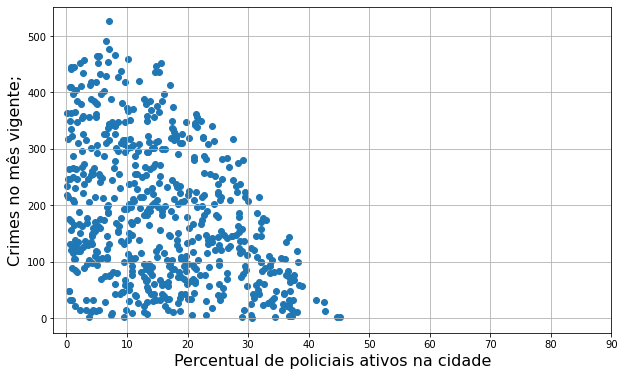

In [212]:
x=df1.perc_pol 
y=df1.crimes

plt.figure(figsize=[10,6])
plt.scatter(x,y)
plt.xticks(range(0,100,10))
plt.xlabel("Percentual de policiais ativos na cidade",fontsize=16)
plt.ylabel("Crimes no mês vigente;",fontsize=16)
plt.grid()
plt.show()

In [213]:
lr=skll.LinearRegression()

In [214]:
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [215]:
lr.fit(x,y)

LinearRegression()

In [216]:
y_pred=lr.predict(x)

In [217]:
y_pred

array([[220.01345055],
       [144.41807196],
       [164.83640764],
       [207.30270488],
       [ 99.59493287],
       [177.11490413],
       [221.08605381],
       [101.06396001],
       [209.62510383],
       [239.21140584],
       [220.54783642],
       [122.40967533],
       [243.9743828 ],
       [199.3368729 ],
       [146.19435345],
       [232.56206953],
       [205.61910435],
       [104.48640223],
       [237.25863967],
       [193.20385354],
       [ 81.40323603],
       [118.18102354],
       [112.28630939],
       [166.68923712],
       [224.39224305],
       [207.73213325],
       [218.78304754],
       [227.30470636],
       [221.70030499],
       [109.26026906],
       [193.02453383],
       [232.55614411],
       [242.39097732],
       [224.54469681],
       [247.8729333 ],
       [216.07427148],
       [125.00575547],
       [193.96762111],
       [194.15794369],
       [216.04566675],
       [236.22454452],
       [ 94.33837252],
       [149.84825241],
       [247

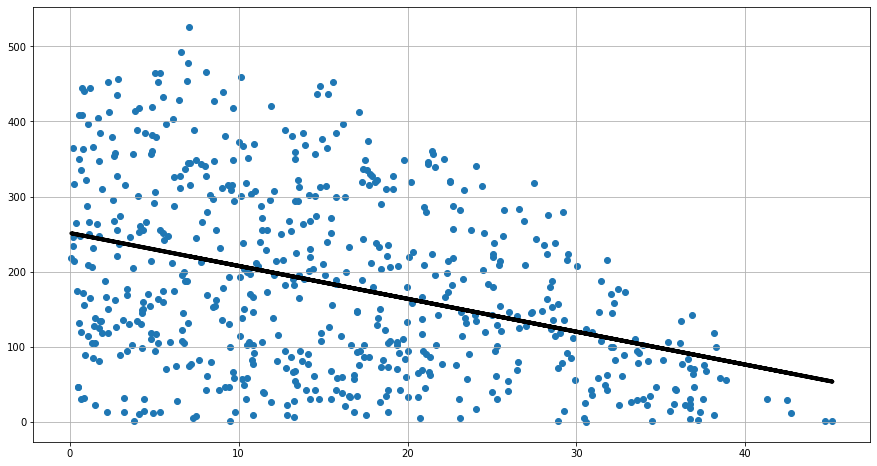

In [218]:
plt.figure(figsize=[15,8])
plt.scatter(x,y)
plt.xticks(range(0,110,10))
plt.grid()
plt.plot(x,y_pred,c="black",lw=4)
plt.show()

In [219]:
def rmse(y,y_pred):
    return np.sqrt(np.mean((y-y_pred)**2))

In [220]:
rmse(y=y,y_pred=y_pred)

113.78608805962723

In [221]:
import sklearn.neighbors as skln

In [222]:
x1=df1.perc_pol.values.reshape(-1,1)
y1=df1.crimes.values

In [223]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = x1, 
                             y = y1, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[0.19738728 0.18643706 0.07733772 0.10679715 0.13069939]
media:  0.13973171729079623
desvio padrão:  0.04596701529161577


Acima, temos o resultado do R2 médio para os 5 folds de validação no modelo de regressão linear.
Lembrando que o R2 em treino foi de 0.13, vemos que o modelo de regressão linear, apesar de não ter uma ótima performance no dataset, não está overfitando, uma vez que as métricas em treino e cross-validação estão se mantendo.

Ainda, destacamos que o desvio padrão do R2 nos folds de validação é baixo, mostrando uma estabilidade do modelo.

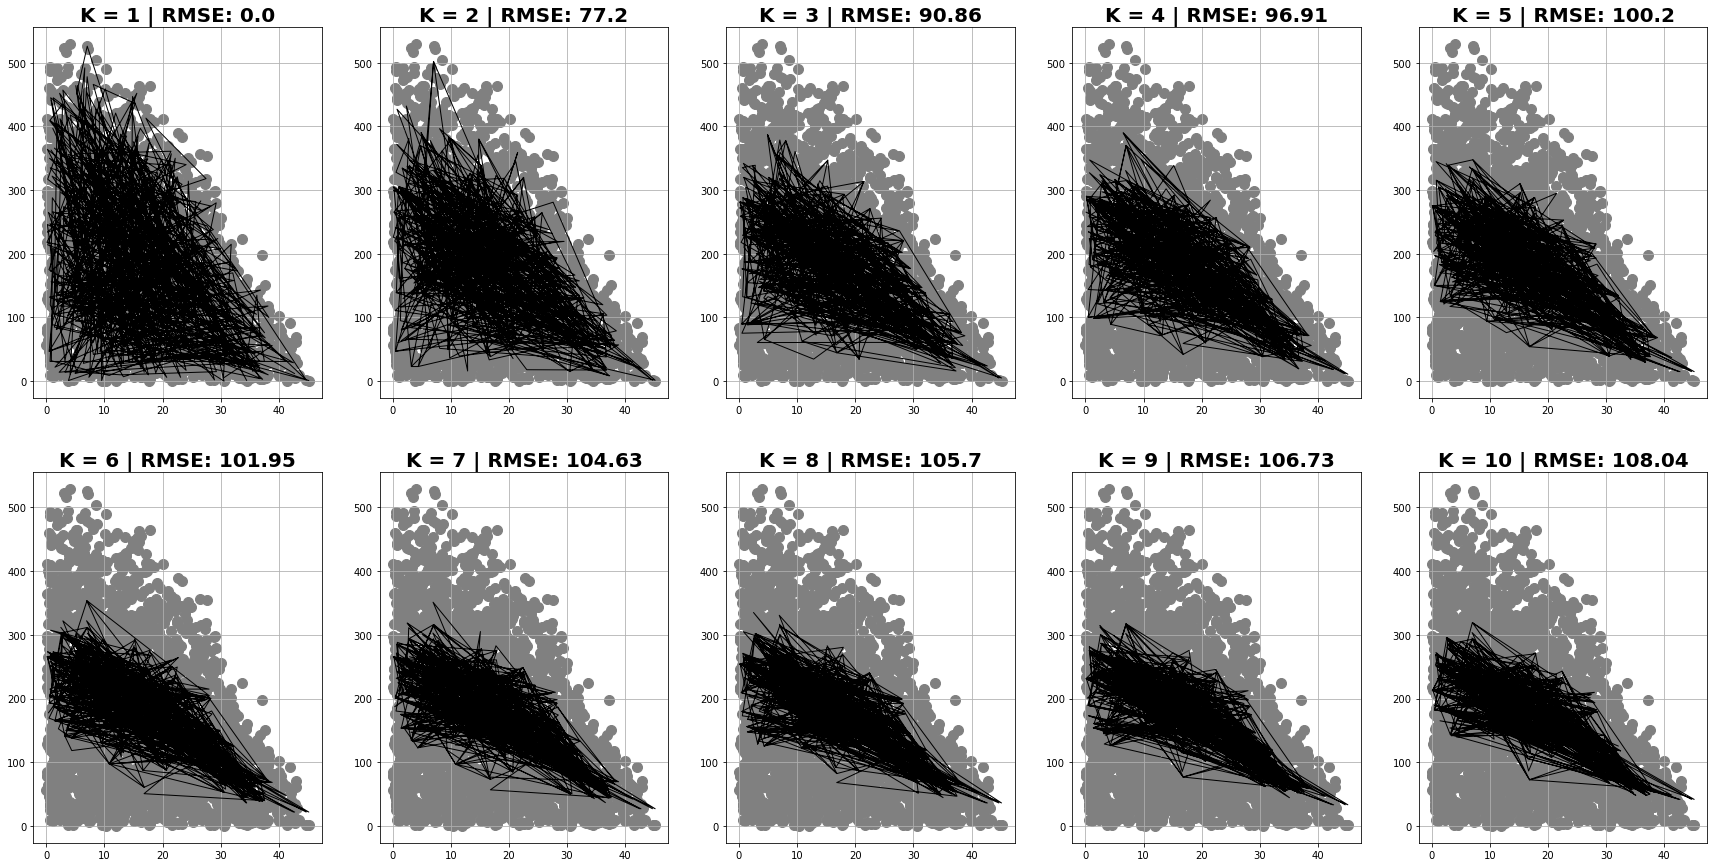

In [224]:
plt.figure(figsize=[30,15])
lista=list(np.arange(1,11,1))
k1=1

for i in lista:
    knn =skln.KNeighborsRegressor(n_neighbors=i) .fit(x1, y1)
    rmse_knn = np.round(rmse(y = y1, y_pred = knn.predict(x1)), 2)
    
    plt.subplot(2,5,k1)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(x1, knn.predict(x1), c = 'black', lw = 1)
    plt.scatter(df.perc_pol, df.crimes, s = 100, c = 'gray')
    plt.grid()
    k1=k1+1

plt.show()

In [225]:
x2=df2.perc_pol.values.reshape(-1,1)
y2=df2.crimes.values

In [226]:
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(rmse(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(rmse(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 100)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'gray', s = 100)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

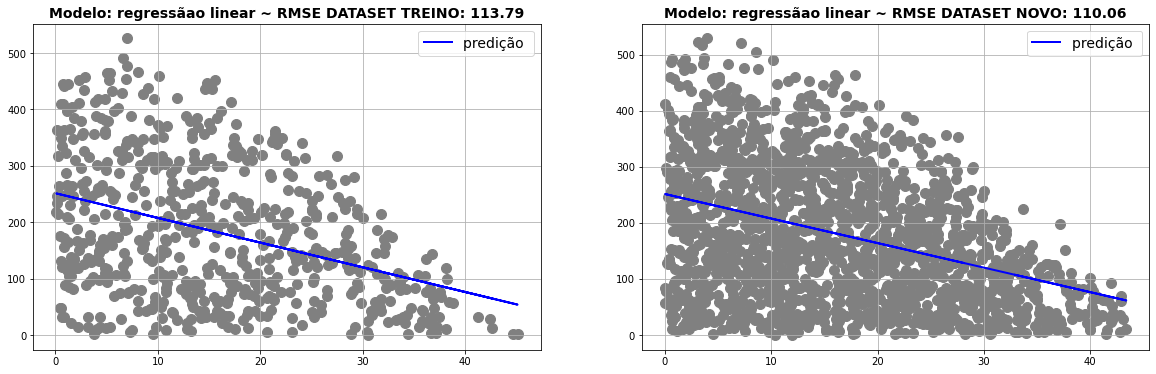

In [227]:
modelo=skll.LinearRegression()
nome_modelo="regressãao linear"
plota_curva_regressao(x1,y1,x2,y2,modelo,nome_modelo)

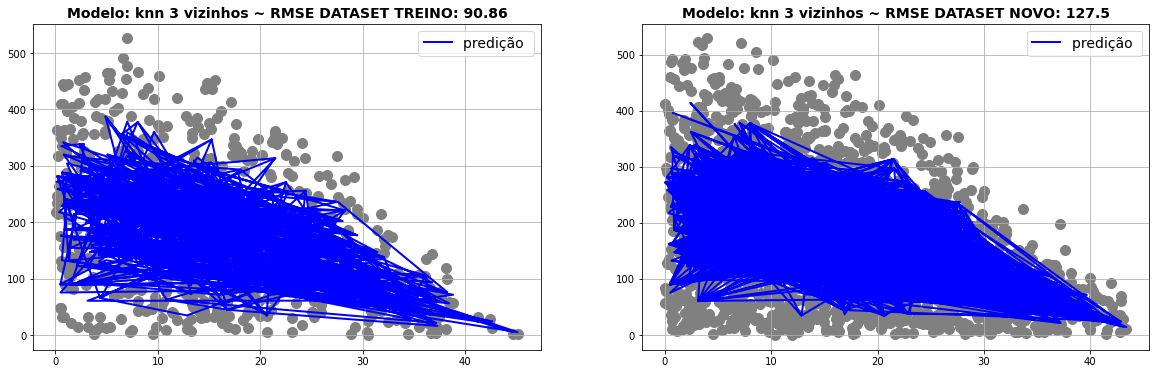

In [228]:
modelo=skln.KNeighborsRegressor(n_neighbors=3)
nome_modelo=("knn 3 vizinhos")
plota_curva_regressao(x1,y1,x2,y2,modelo,nome_modelo)

#### No modelo knn com 3 vizinhoss podemos verificar a ocorrencia de overfitting devido a diferença considerável entre o rmse de treino e o rmse de teste

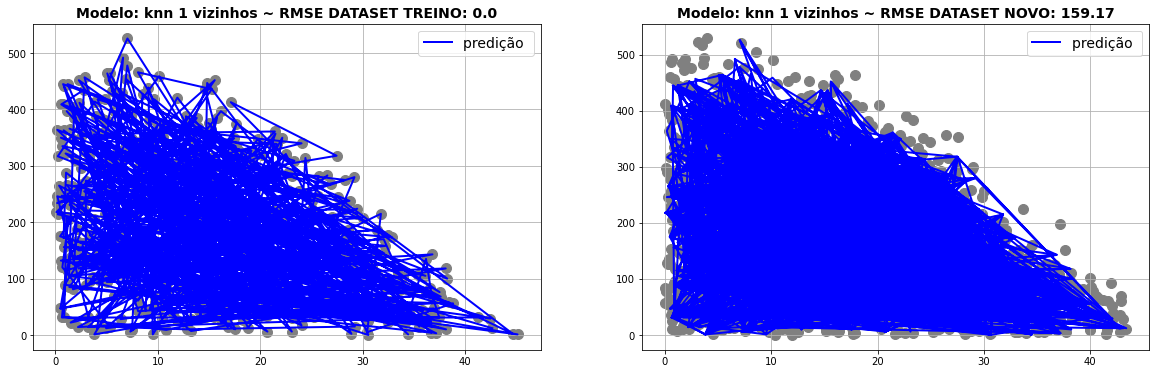

In [229]:
modelo=skln.KNeighborsRegressor(n_neighbors=1)
nome_modelo=("knn 1 vizinhos")
plota_curva_regressao(x1,y1,x2,y2,modelo,nome_modelo)

#### No modelo knn com 1 vizinhoss podemos verificar a ocorrencia de overfitting devido a grande diferença entre o rmse de treino e o rmse de teste

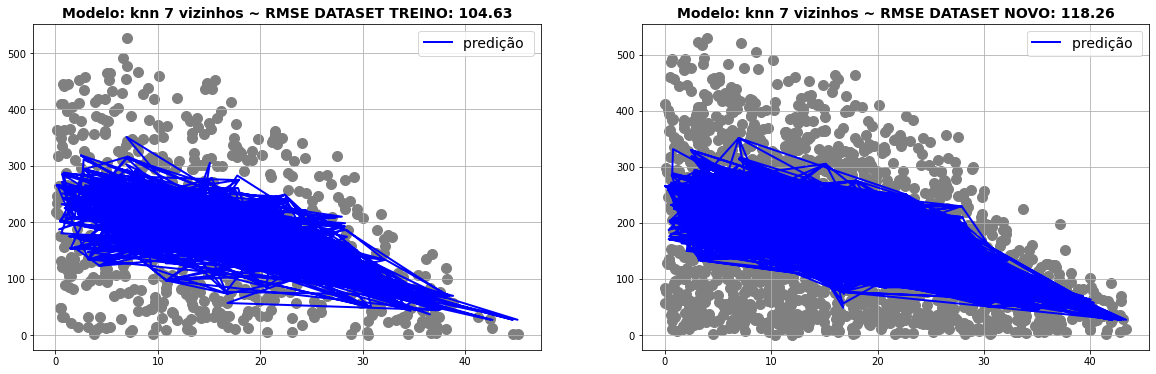

In [230]:
modelo=skln.KNeighborsRegressor(n_neighbors=7)
nome_modelo=("knn 7 vizinhos")
plota_curva_regressao(x1,y1,x2,y2,modelo,nome_modelo)

#### No modelo knn com 7 vizinhos ja nao é possível observar uma diferença tão significativa entre o rmse de treino e o rmse de teste, portanto nao está ocorrendo overfitting. 

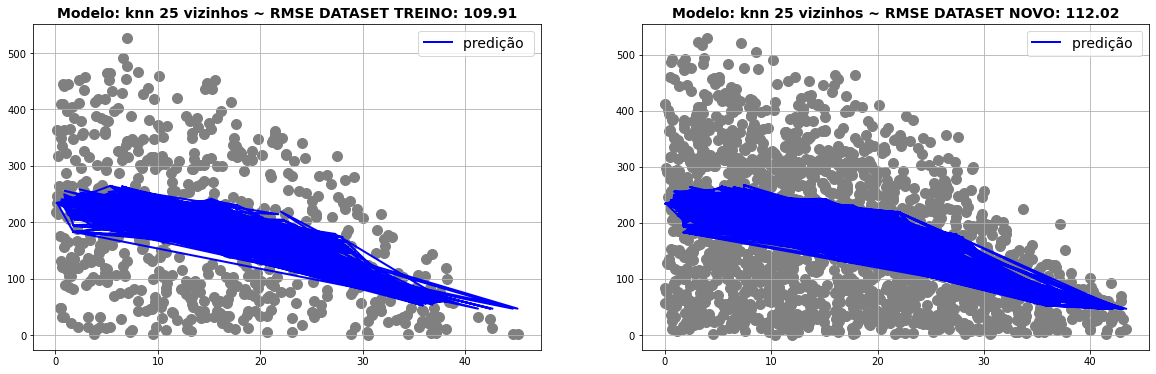

In [238]:
modelo=skln.KNeighborsRegressor(n_neighbors=25)
nome_modelo=("knn 25 vizinhos")
plota_curva_regressao(x1,y1,x2,y2,modelo,nome_modelo)

#### no modelo knn com 25 vizinhos foi observada uma diferença minima entre o rmse de treino e o rmse de teste, se configurando como o modelo ideal para tal estudo.

In [235]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(x2, y2)
    
    preds = knn.predict(x2)
    
    rmse_train = RMSE(ytrue = y2, ypred = preds)
    r2_train = r2_score(y_true = y2, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:0.0 / R2: 1.0
K = 2 | RMSE:77.34 / R2: 0.58
K = 5 | RMSE:97.29 / R2: 0.33
K = 10 | RMSE:103.4 / R2: 0.24
K = 20 | RMSE:106.27 / R2: 0.2
K = 50 | RMSE:108.48 / R2: 0.17


In [240]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = x2, 
                                 y = y2, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(x2, y2)
    r2_train = r2_score(y_true=y2, y_pred=modelo.predict(x2))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

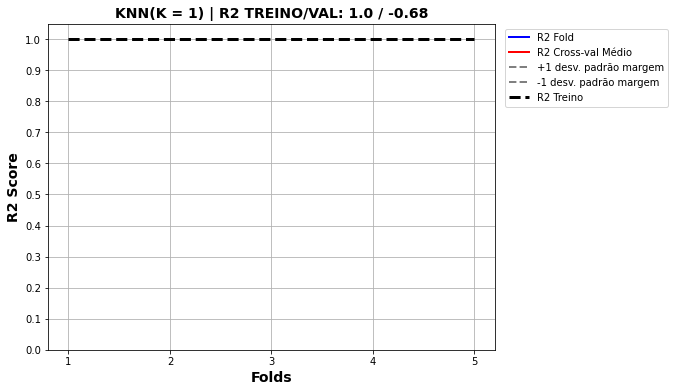

In [241]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = x2, 
                           y = y2, 
                           num_folds = 5)

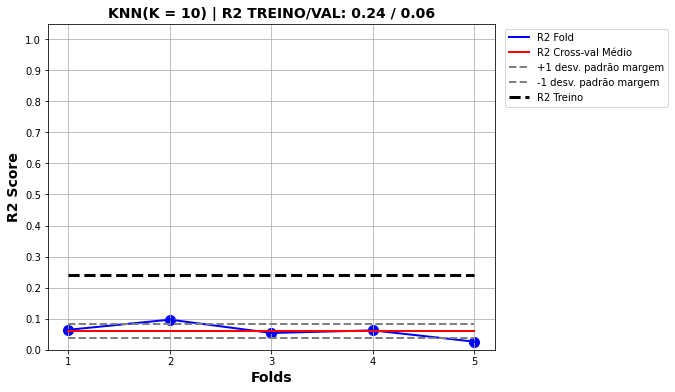

In [242]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = x2, 
                           y = y2, 
                           num_folds = 5)

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.

In [198]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [199]:
x3=df1[["perc_pol","taxa_crim","nivel_ed","ind_pop_cid"]].values
y3=df1.crimes.values
type(x3), x3.shape

(numpy.ndarray, (615, 4))

In [200]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(x3, y3)
    
    preds = knn.predict(x3)
    
    rmse_train = RMSE(ytrue = y3, ypred = preds)
    r2_train = r2_score(y_true = y3, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:0.0 / R2: 1.0
K = 2 | RMSE:24.5 / R2: 0.96
K = 5 | RMSE:31.35 / R2: 0.93
K = 10 | RMSE:34.73 / R2: 0.92
K = 20 | RMSE:39.54 / R2: 0.9
K = 50 | RMSE:49.3 / R2: 0.84


In [201]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = x3, 
                                 y = y3, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(x3, y3)
    r2_train = r2_score(y_true=y3, y_pred=modelo.predict(x3))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

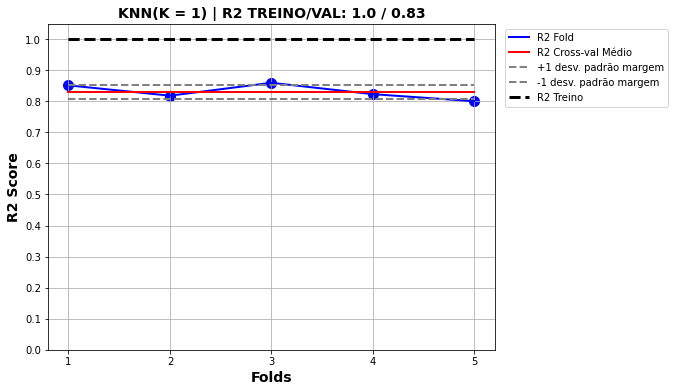

In [202]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = x3, 
                           y = y3, 
                           num_folds = 5)

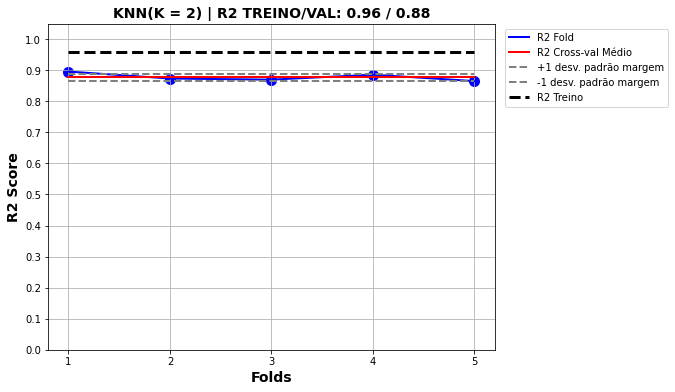

In [203]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 2),
                           nome_modelo = 'KNN(K = 2)',
                           X = x3, 
                           y = y3, 
                           num_folds = 5)

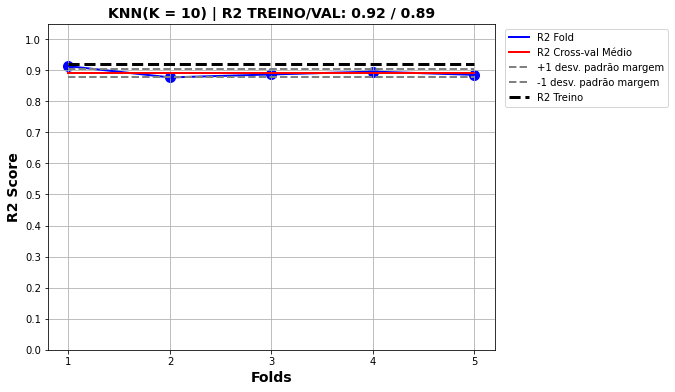

In [204]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = x3, 
                           y = y3, 
                           num_folds = 5)

Aparentemente com KNN igual a 10, utilizando todas as variaveis no treino, não está sofrendo overfitting.